<a href="https://colab.research.google.com/github/antonioalbanese/Time-Series-Anomaly-Detection-An-experimental-survey/blob/main/results_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

excel = pd.read_excel("ris.xlsx")
excel.columns = ['SEED', 'SEQ_LEN', 'DATASET', 'METHOD', 'THRESHOLD', 'True-f1',
       'weighted-f1', 'accuracy', 'true_recall', 'true_precision',
       'weighted_recall', 'weighted_precision', 'epoch_time']

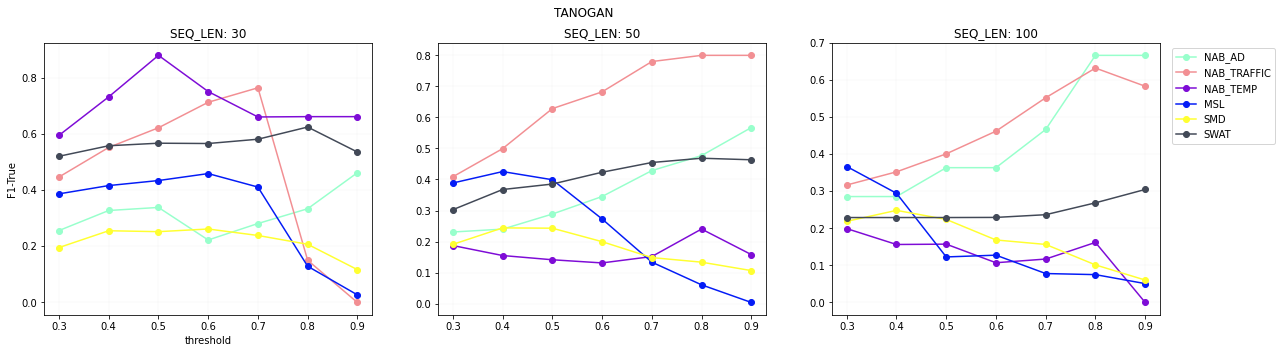

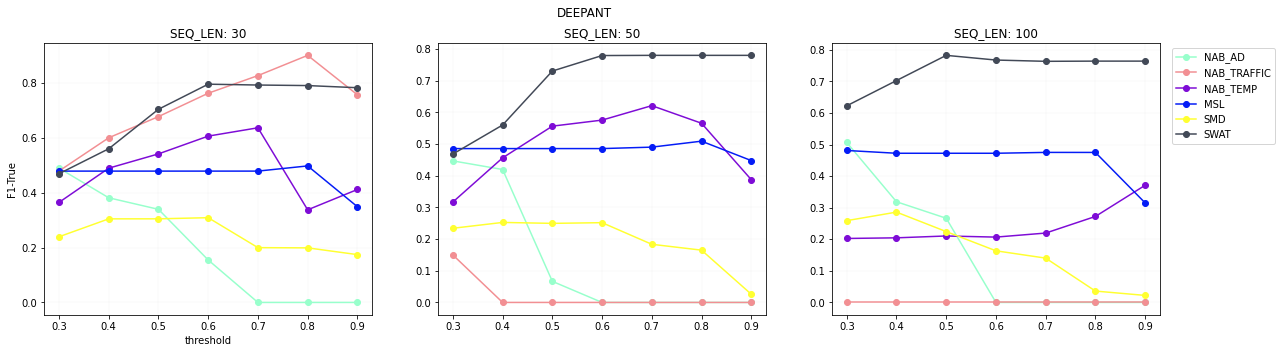

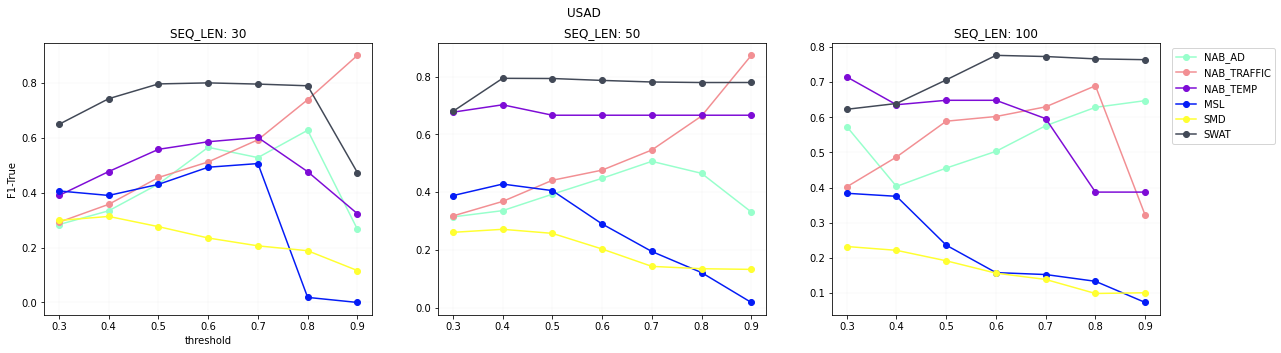

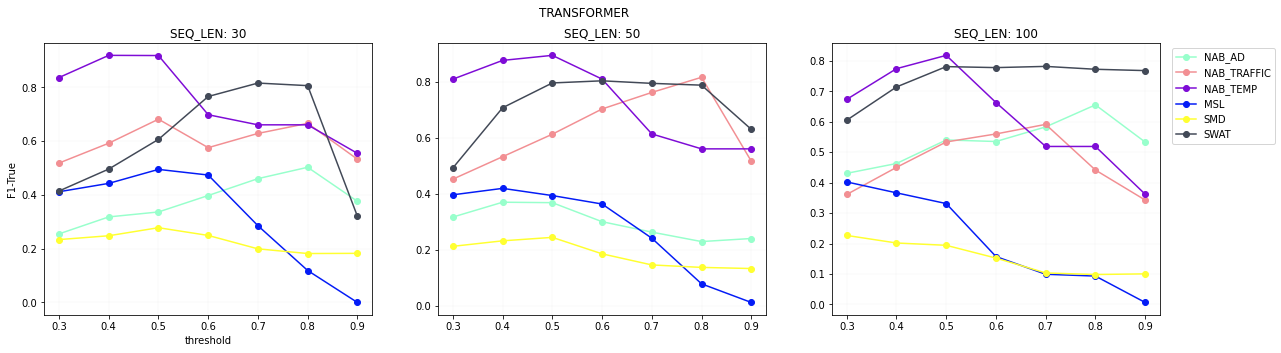

In [6]:
for m in methods: 
  fig, axs = plt.subplots(1, 3, figsize=(20,5))
  fig.suptitle(m)
  for i,d in enumerate(datasets): 
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=d, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")

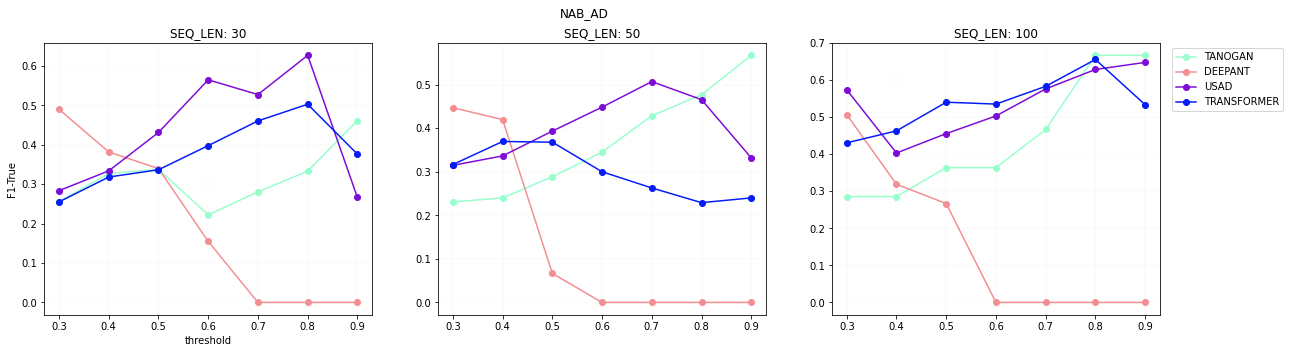

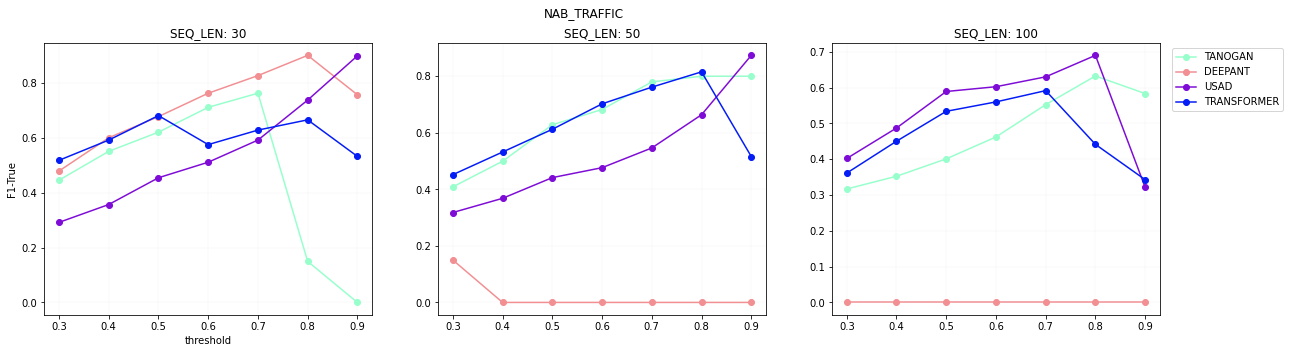

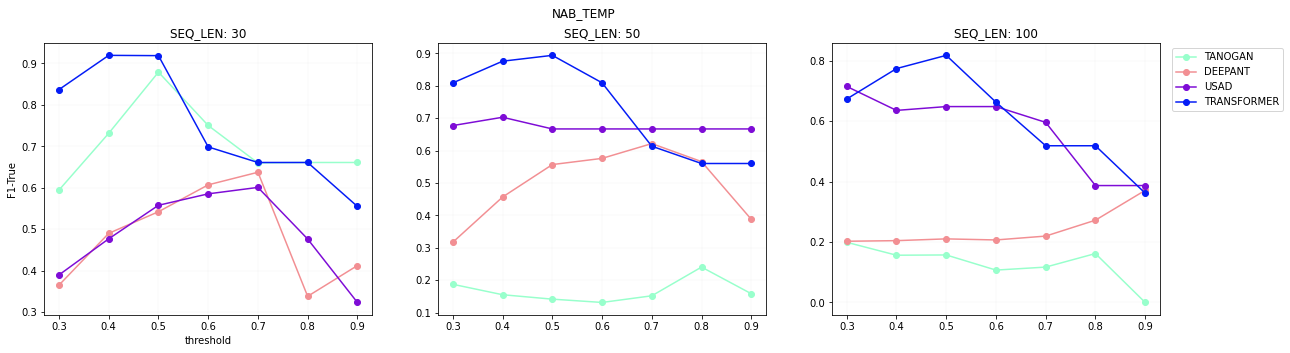

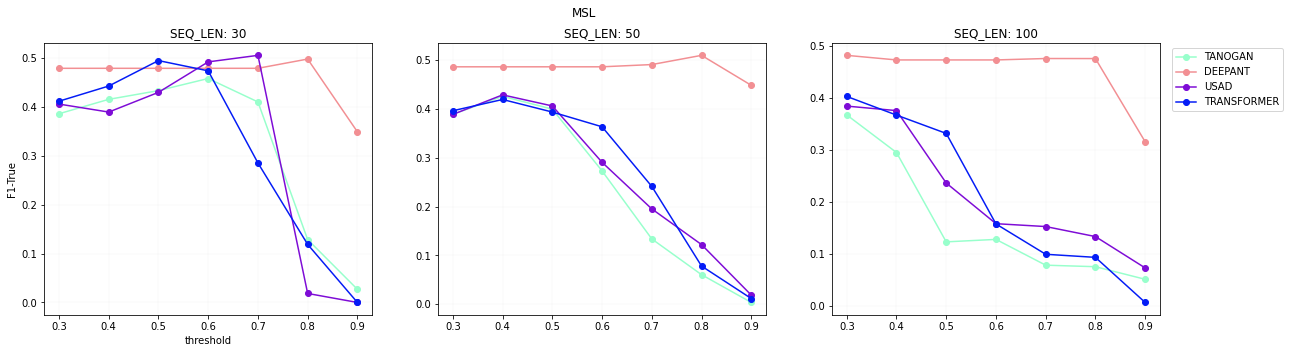

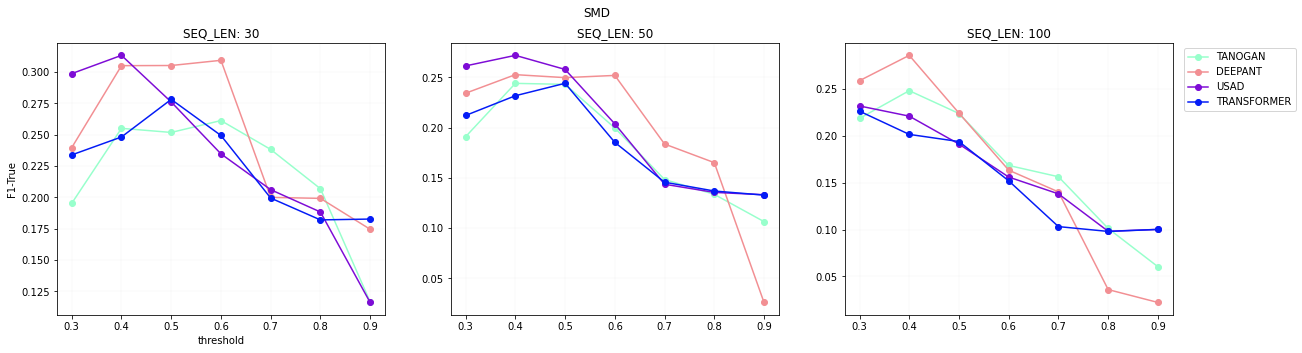

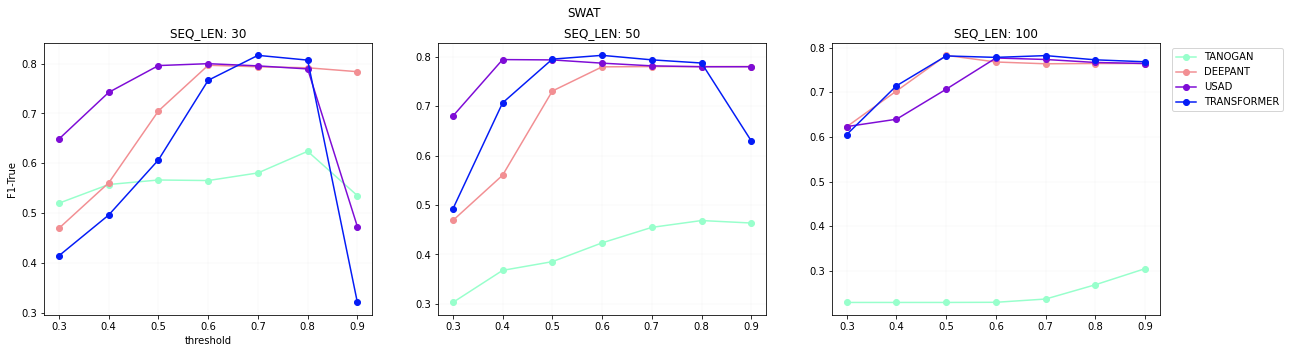

In [7]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

for d in datasets:
  fig, axs = plt.subplots(1, len(lengths), figsize=(20,5))
  fig.suptitle(d)
  for i,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=m, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")


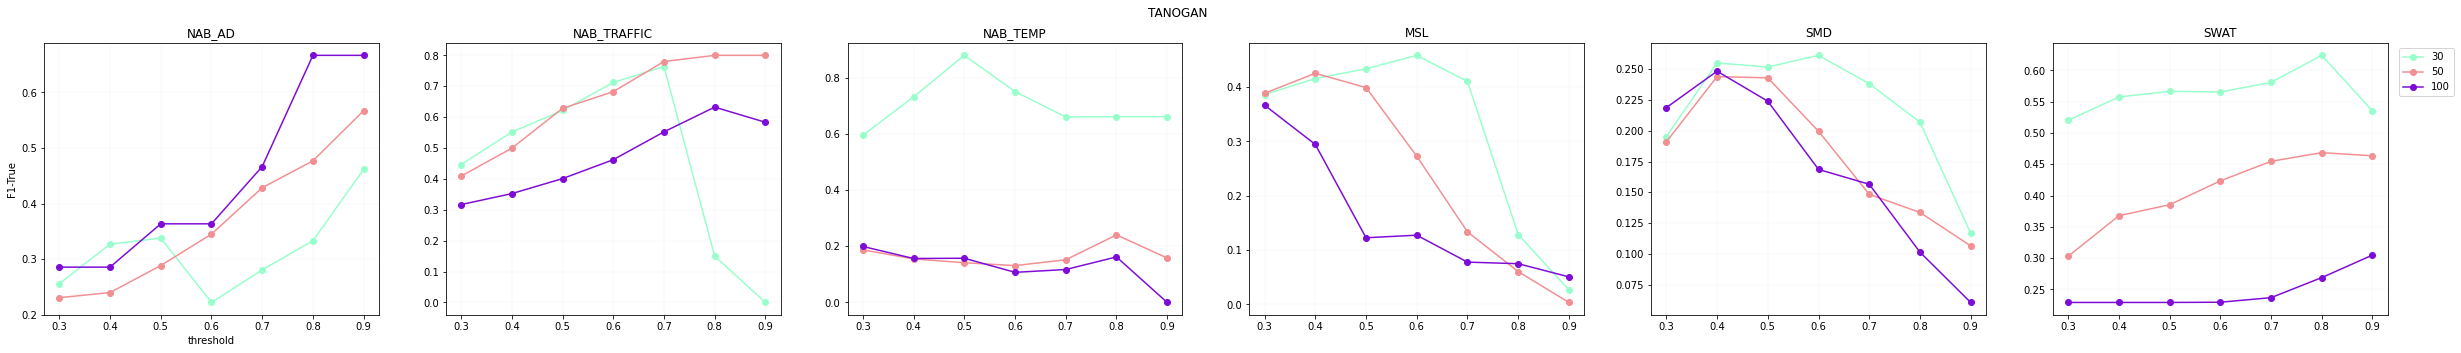

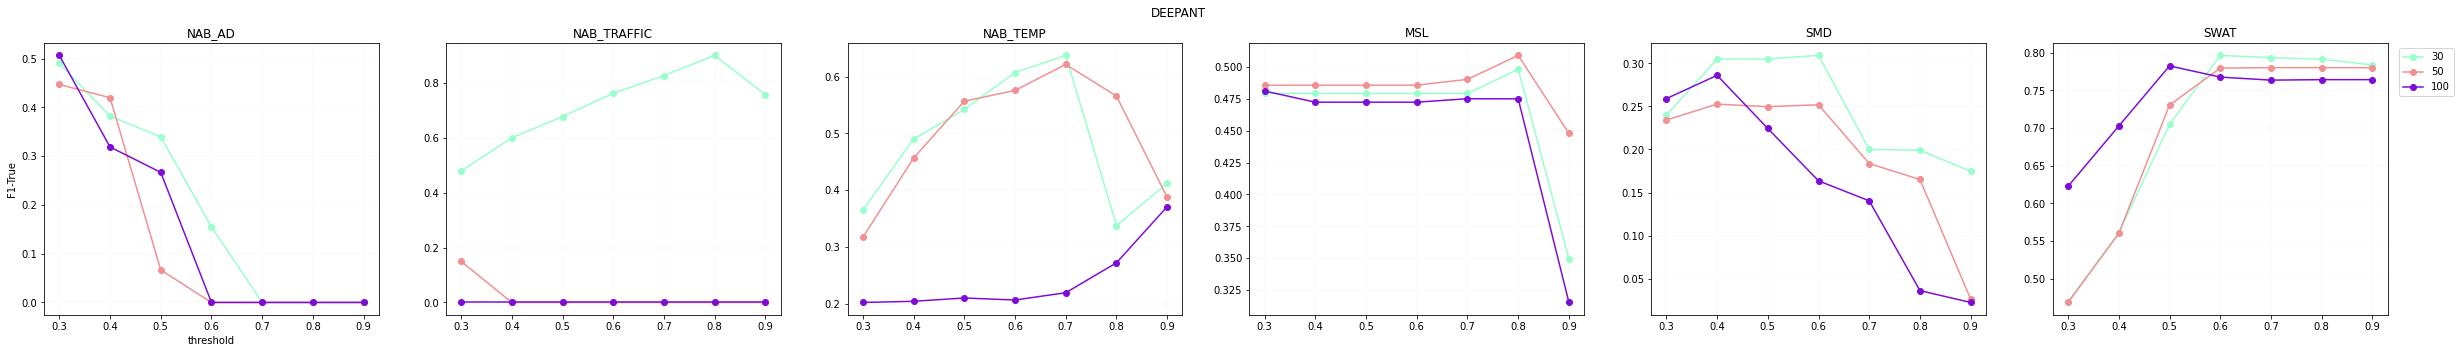

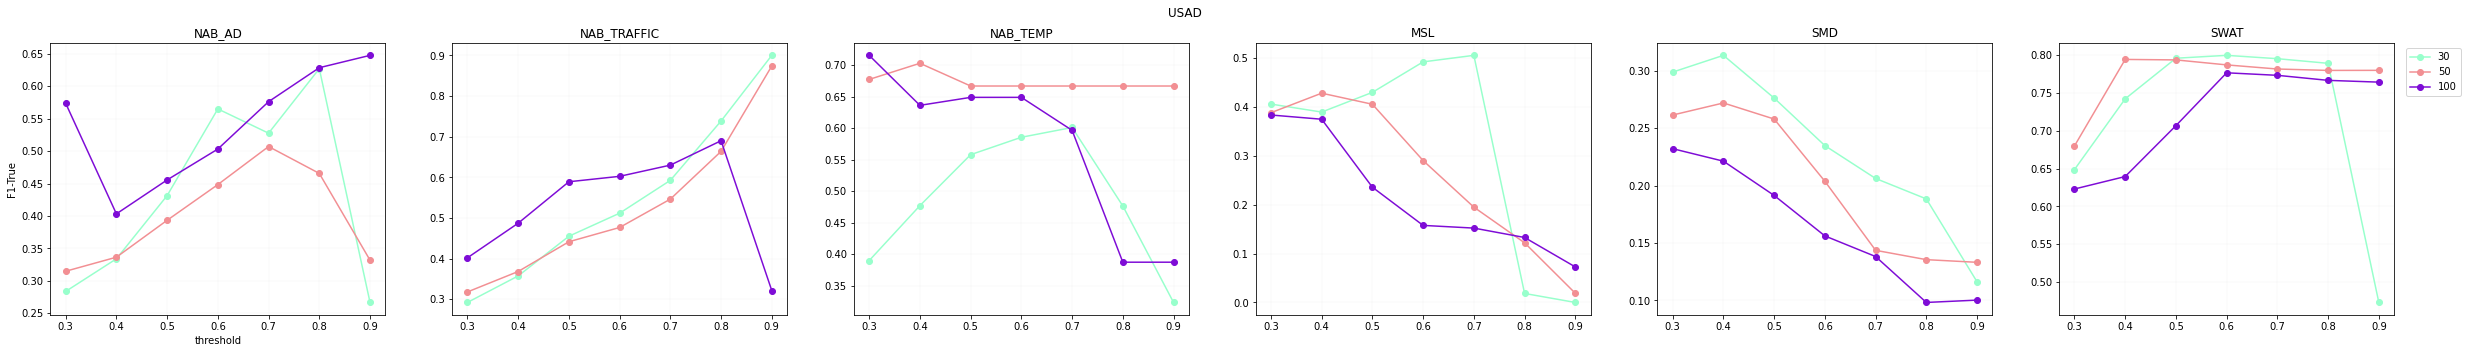

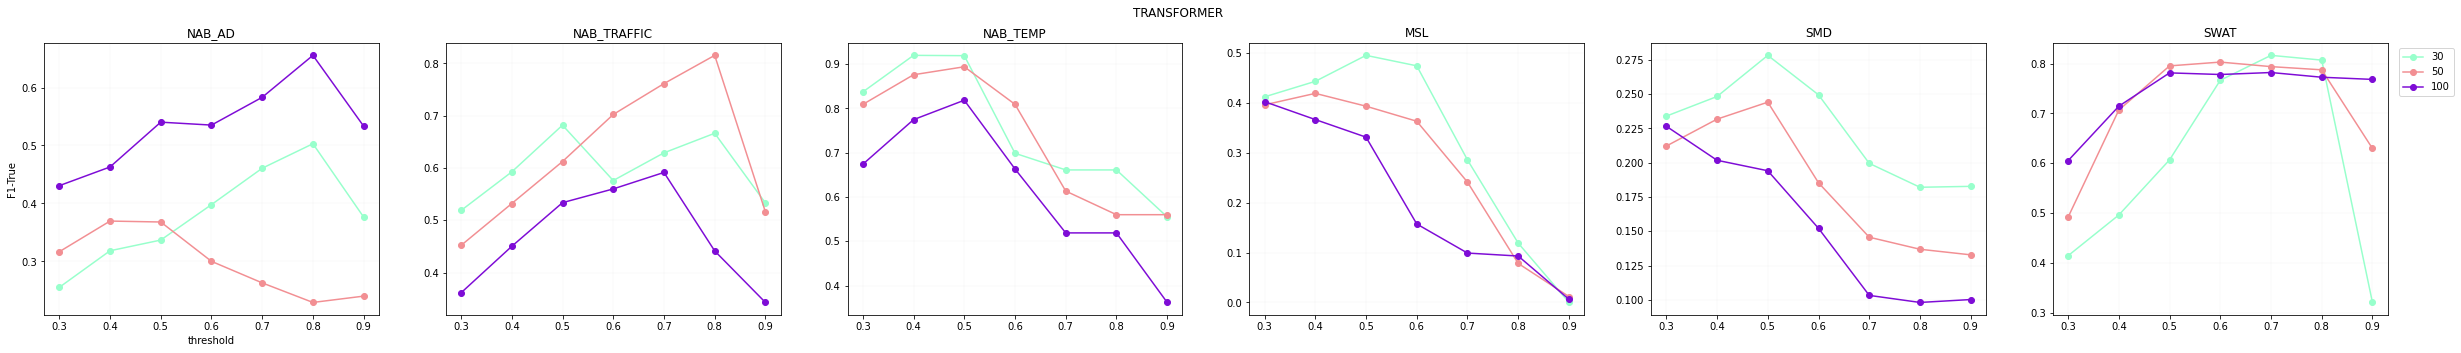

In [11]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]



for m in methods:
  fig, axs = plt.subplots(1, len(datasets), figsize=(len(datasets)*7,5))
  fig.suptitle(m)
  for j,d in enumerate(datasets):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for i,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=l, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("{}".format(d))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")



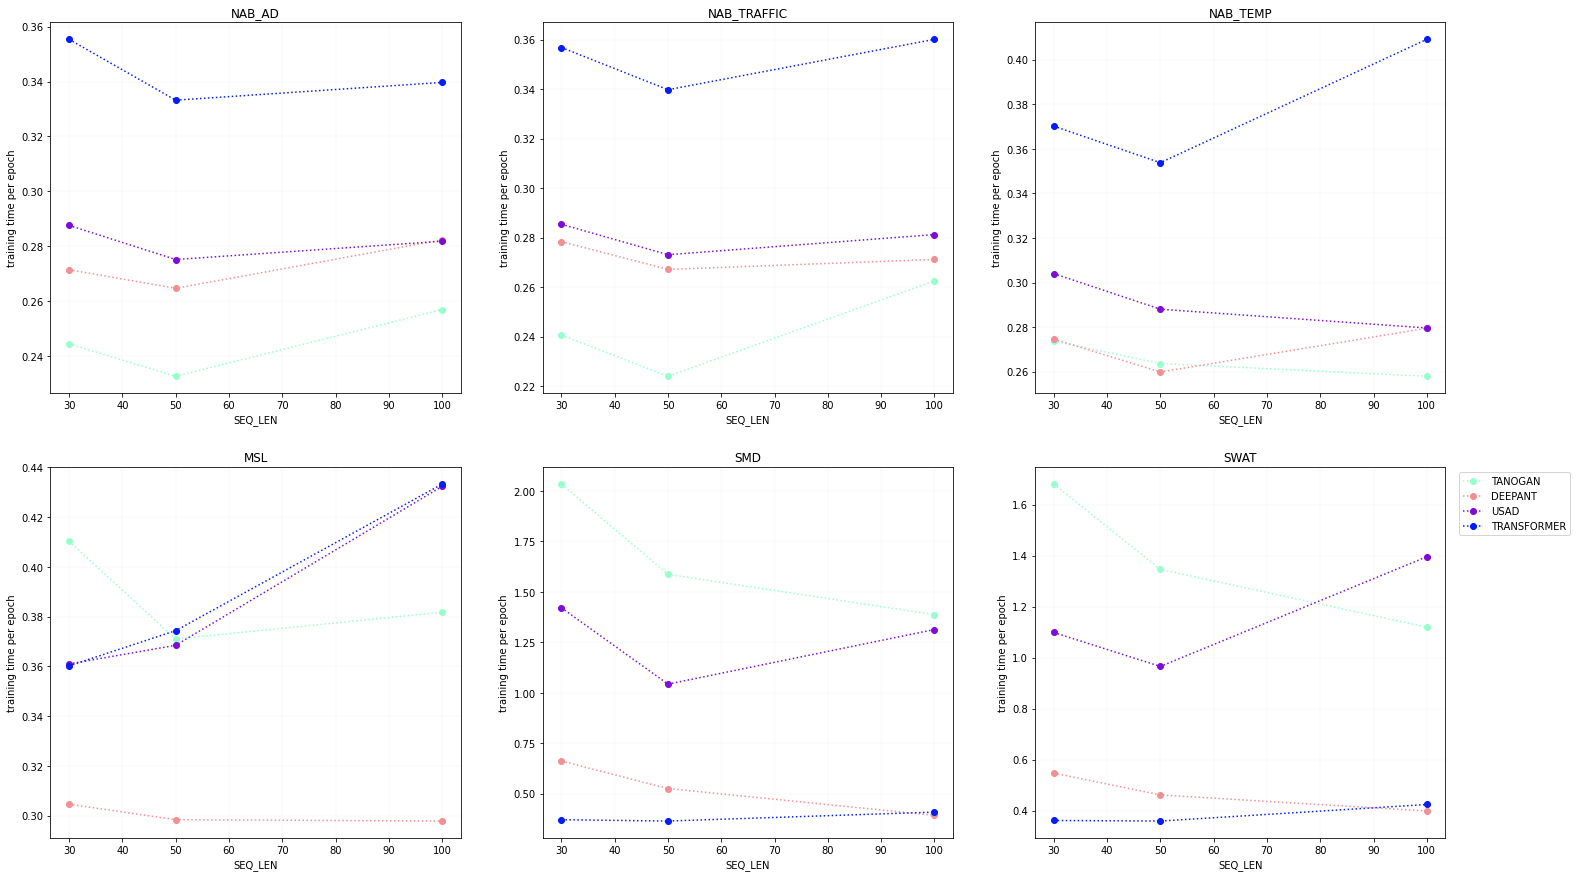

In [97]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

fig, axs = plt.subplots(2, 3, figsize=(25,15))
for i,d in enumerate(datasets):
  for j,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN']).mean().reset_index()
    axs.flat[i].plot(means['SEQ_LEN'],
              means['epoch_time'],
              label=m, 
              color=colors[j], 
              linestyle=styles[2],
              marker='o')
    axs.flat[i].grid(color='lightgrey', linestyle='-', linewidth=0.1)
    axs.flat[i].set_title("{}".format(d))
    axs.flat[i].set(xlabel="SEQ_LEN",ylabel="training time per epoch")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()


In [152]:
for d in datasets:
  points={
      'DEEPANT':0,
      'TANOGAN':0,
      'USAD':0,
      'TRANSFORMER':0
  }
  points_wtime={
      'DEEPANT':0,
      'TANOGAN':0,
      'USAD':0,
      'TRANSFORMER':0
  }
  for l in lengths:
    data = excel[(excel['DATASET']==d) & (excel['SEQ_LEN']==l)].groupby('METHOD').max()['True-f1'].reset_index().sort_values('True-f1')
    time = excel[(excel['DATASET']==d) & (excel['SEQ_LEN']==30)].groupby('METHOD').max()['epoch_time'].reset_index().sort_values('epoch_time', ascending=False)
    for i,el in enumerate(data['METHOD']):
      points[el] += i
      points_wtime[el] += i
    for i,el in enumerate(time['METHOD']):
      points_wtime[el] += i/4
  print("------- {} -------".format(d))
  print("Best w/o time: {}".format(max(points, key=points.get)))
  print("Best w/ time: {}".format(max(points_wtime, key=points_wtime.get)))
  print()
  print()

------- NAB_AD -------
Best w/o time: TRANSFORMER
Best w/ time: USAD


------- NAB_TRAFFIC -------
Best w/o time: USAD
Best w/ time: USAD


------- NAB_TEMP -------
Best w/o time: USAD
Best w/ time: USAD


------- MSL -------
Best w/o time: DEEPANT
Best w/ time: DEEPANT


------- SMD -------
Best w/o time: DEEPANT
Best w/ time: DEEPANT


------- SWAT -------
Best w/o time: TRANSFORMER
Best w/ time: TRANSFORMER


